# Cleaning the NHANES diabetes data

[DSLC stages]: Data cleaning and pre-processing


Start by loading in any libraries that you will use in this document.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)


## Domain problem formulation

Type 1 Diabetes is an autoimmune disease which attacks the pancrease and decreases / eliminates the production on insulin for the body. As a result, various symptoms occur - including: blurry vision, dry skin, fatigue, hunger, etc.

About 10 in the human genome have been linked to increasing the risk of Type 1 diabetes. It is important to note, the posession of the gene does not necessarily indicate the pateint will develop Type 1 diabetes. 

The focus of our project will be to determine if their is a correlation between age of diagnosis and additonal complications seen in the patient (e.g. heart conditions, liver conditions, cancer, etc.). A question we asked ourselves is "Are patients with early diagnosis more likely to develop additional complications?" There are bias's present, including lifestyle choices, class status, and geography that may play a factor in this study.

Additonal studies which may be conducted in this project are whether type 1 diabetics are more likley to develop certain conditions compared to type 2 diabetics. 

**Investigate whether younger diagnosis age is associated with a higher risk of developing long-term complications in Type 1 diabetes patients.**






## Data source overview

The data used for this project comes from the National Health and Nutrition Examination Survey (NHANES) 2013–2014, a program conducted by the National Center for Health Statistics (NCHS). NHANES combines in-person interviews and physical examinations to assess the health and nutritional status of a nationally representative and diverse sample of approximately 5,000 individuals each year, including over-sampling of groups such as older adults, African Americans, Asians, and Hispanics. This survey provides critical data on chronic conditions like diabetes and associated risk factors, supporting public health policy and research initiatives.


## Step 1: Review background information {#sec-bg-info}

### Information on data collection

The NHANES 2013–2014 data was collected through in-person interviews at participants' homes and physical exams at mobile centers. The interviews covered demographics, diet, and health, while exams included medical tests by trained staff. NHANES also keeps in touch with some patients for follow-up studies to track long-term health outcomes

### Data dictionary

If there is a data dictionary, give some details here.


### Answering questions about the background information

Answer the recommended background information questions from the Data Cleaning chapter.

- *What does each variable measure?*
The variables include diagnosis age, complication status, types of complications, and demographic factors like gender and socioeconomic status, measuring health outcomes and risk factors in Type 1 and Type 2 diabetes patients.

- *How was the data collected?*
The data was collected through in-person interviews and physical examinations at mobile centers, with follow-up for long-term health tracking in some patients.


- *What are the observational units?*
Unique cases of "Yes" or "No" answers.

- *Is the data relevant to my project?*
Yes, it is directly relevant as it includes health outcomes and complications, which are crucial for analyzing the relationship between diagnosis age and long-term risks in Type 1 diabetes patients. A larger sample size would be ideal. 



## Step 2: Loading in the data


Load in the data.


In [2]:
filename = r"C:\Users\risha\Cornell University\Intro to Data Science\ORIE5160\ORIE-5160-Midterm-Project\data\samadult.csv"

In [3]:
diabetes_pd = pd.read_csv(filename)

Let's look at the first few rows to make sure it looks like it has been loaded in correctly:

In [4]:
diabetes_pd.head()

,FPX,FMX,HHX,INTV_QRT,WTIA_SA,WTFA_SA,SEX,HISPAN_I,R_MARITL,MRACRPI2,RACERPI2,MRACBPI2,AGE_P,RECTYPE,SRVY_YR,INTV_MON,REGION,PSTRAT,PPSU,PROX1,PROX2,LATEINTA,PROXYSA,PAR_STAT,FDRN_FLG,DOINGLWA,WHYNOWKA,EVERWRK,SUPERVIS,WRKCATA,BUSINC1A,LOCALL1B,WRKLONGH,HOURPDA,PDSICKA,ONEJOB,WRKLYR4,INDSTRN1,INDSTRN2,OCCUPN1,OCCUPN2,YRSWRKPA,DIFAGE2,HYPEV,HYPDIFV,HYPMDEV2,HYPMED2,CHLEV,CHLYR,CHLMDEV2,CHLMDNW2,CHDEV,ANGEV,MIEV,HRTEV,STREV,EPHEV,COPDEV,ASPMEDEV,ASPMEDAD,ASPMDMED,ASPONOWN,AASMEV,AASSTILL,AASMYR,AASERYR1,ULCEV,ULCYR,ULCCOLEV,CANEV,CNKIND1,CNKIND2,CNKIND3,CNKIND4,CNKIND5,CNKIND6,CNKIND7,CNKIND8,CNKIND9,CNKIND10,CNKIND11,CNKIND12,CNKIND13,CNKIND14,CNKIND15,CNKIND16,CNKIND17,CNKIND18,CNKIND19,CNKIND20,CNKIND21,CNKIND22,CNKIND23,CNKIND24,CNKIND25,CNKIND26,CNKIND27,CNKIND28,CNKIND29,CNKIND30,CNKIND31,PREGEVER,DBHVPAY,DBHVCLY,DBHVWLY,DBHVPAN,DBHVCLN,DBHVWLN,DIBREL,DIBEV1,DIBPRE2,DIBTEST,DIBTYPE,DIBPILL1,INSLN1,DIBINS2,DIBINS3,DIBINS4,DIBGDM,DIBBABY,DIBPRGM,DIBREFER,DIBBEGIN,AHAYFYR,SINYR,CBRCHYR,KIDWKYR,LIVYR,JNTSYMP,JMTHP1,JMTHP2,JMTHP3,JMTHP4,JMTHP5,JMTHP6,JMTHP7,JMTHP8,JMTHP9,JMTHP10,JMTHP11,JMTHP12,JMTHP13,JMTHP14,JMTHP15,JMTHP16,JMTHP17,JNTCHR,JNTHP,ARTH1,ARTHLMT,PAINECK,PAINLB,PAINLEG,PAINFACE,AMIGR,ACOLD2W,AINTIL2W,PREGNOW,PREGFLYR,HRAIDNOW,HRAIDEV,AHEARST1,AVISION,ABLIND,VIM_DREV,VIMLS_DR,VIM_CAEV,VIMLS_CA,VIMCSURG,VIM_GLEV,VIMLS_GL,VIM_MDEV,VIMLS_MD,VIMGLASS,VIMREAD,VIMDRIVE,AVISREH,AVISDEV,AVDF_NWS,AVDF_CLS,AVDF_NIT,AVDF_DRV,AVDF_PER,AVDF_CRD,AVISEXAM,AVISACT,AVISPROT,LUPPRT,CHPAIN6M,PAINLMT,HYPYR1,CANAGE1,CANAGE2,CANAGE3,CANAGE4,CANAGE5,CANAGE6,CANAGE7,CANAGE8,CANAGE9,CANAGE10,CANAGE11,CANAGE12,CANAGE13,CANAGE14,CANAGE15,CANAGE16,CANAGE17,CANAGE18,CANAGE19,CANAGE20,CANAGE21,CANAGE22,CANAGE23,CANAGE24,CANAGE25,CANAGE26,CANAGE27,CANAGE28,CANAGE29,CANAGE30,DIBAGE1,ACHRC14A,ADURA14A,ADURB14A,AFLHC19_,AFLHC20_,AFLHC21_,AFLHC22_,AFLHC23_,AFLHC24_,AFLHC25_,AFLHC26_,AFLHC27_,AFLHC28_,AFLHC29_,AFLHC30_,AFLHC31_,AFLHC32_,AFLHC33_,AFLHC34_,AFLHCA1,AFLHCA10,AFLHCA11,AFLHCA12,AFLHCA13,AFLHCA15,AFLHCA16,AFLHCA17,AFLHCA18,AFLHCA2,AFLHCA3,AFLHCA4,AFLHCA5,AFLHCA6,AFLHCA7,AFLHCA8,AFLHCA9,AFLHCA90,AFLHCA91,AHSTATYR,ALCHRC1,ALCHRC10,ALCHRC11,ALCHRC12,ALCHRC13,ALCHRC15,ALCHRC16,ALCHRC17,ALCHRC18,ALCHRC19,ALCHRC2,ALCHRC20,ALCHRC21,ALCHRC22,ALCHRC23,ALCHRC24,ALCHRC25,ALCHRC26,ALCHRC27,ALCHRC28,ALCHRC29,ALCHRC3,ALCHRC30,ALCHRC31,ALCHRC32,ALCHRC33,ALCHRC34,ALCHRC4,ALCHRC5,ALCHRC6,ALCHRC7,ALCHRC8,ALCHRC9,ALCHRC90,ALCHRC91,ALCHRONR,ALCNDRT,ALDURA1,ALDURA10,ALDURA11,ALDURA12,ALDURA13,ALDURA15,ALDURA16,ALDURA17,ALDURA18,ALDURA19,ALDURA2,ALDURA20,ALDURA21,ALDURA22,ALDURA23,ALDURA24,ALDURA25,ALDURA26,ALDURA27,ALDURA28,ALDURA29,ALDURA3,ALDURA30,ALDURA31,ALDURA32,ALDURA33,ALDURA34,ALDURA4,ALDURA5,ALDURA6,ALDURA7,ALDURA8,ALDURA9,ALDURA90,ALDURA91,ALDURB1,ALDURB10,ALDURB11,ALDURB12,ALDURB13,ALDURB15,ALDURB16,ALDURB17,ALDURB18,ALDURB19,ALDURB2,ALDURB20,ALDURB21,ALDURB22,ALDURB23,ALDURB24,ALDURB25,ALDURB26,ALDURB27,ALDURB28,ALDURB29,ALDURB3,ALDURB30,ALDURB31,ALDURB32,ALDURB33,ALDURB34,ALDURB4,ALDURB5,ALDURB6,ALDURB7,ALDURB8,ALDURB9,ALDURB90,ALDURB91,ALHCA14A,ALTIME1,ALTIME10,ALTIME11,ALTIME12,ALTIME13,ALTIME15,ALTIME16,ALTIME17,ALTIME18,ALTIME19,ALTIME2,ALTIME20,ALTIME21,ALTIME22,ALTIME23,ALTIME24,ALTIME25,ALTIME26,ALTIME27,ALTIME28,ALTIME29,ALTIME3,ALTIME30,ALTIME31,ALTIME32,ALTIME33,ALTIME34,ALTIME4,ALTIME5,ALTIME6,ALTIME7,ALTIME8,ALTIME9,ALTIME90,ALTIME91,ALUNIT1,ALUNIT10,ALUNIT11,ALUNIT12,ALUNIT13,ALUNIT15,ALUNIT16,ALUNIT17,ALUNIT18,ALUNIT19,ALUNIT2,ALUNIT20,ALUNIT21,ALUNIT22,ALUNIT23,ALUNIT24,ALUNIT25,ALUNIT26,ALUNIT27,ALUNIT28,ALUNIT29,ALUNIT3,ALUNIT30,ALUNIT31,ALUNIT32,ALUNIT33,ALUNIT34,ALUNIT4,ALUNIT5,ALUNIT6,ALUNIT7,ALUNIT8,ALUNIT9,ALUNIT90,ALUNIT91,ATIME14A,AUNIT14A,BEDDAYR,FLA1AR,FLCARRY,FLCLIMB,FLGRASP,FLPUSH,FLREACH,FLRELAX,FLSHOP,FLSIT,FLSOCL,FLSTAND,FLSTOOP,FLWALK,SPECEQ,WKDAYR,SMKEV,SMKREG,SMKNOW,SMKQTNO,SMKQTTP,CIGSDA1,CIGDAMO,CIGSDA2,CIGQTYR,ECIGEV2,ECIGCUR2,ECIG30D2,CIGAREV2,CIGCUR2,CIG30D2,PIPEV2,PIPECUR2,SMKLSTB1,SMKLSCR2,VIGNO,VIGTP,VIGLNG

## Step 3: Examine the data

In this section we explore the common messy data traits to identify any cleaning action items.



In [5]:
diabetes_pd.shape

(33028, 805)

Filter out the dataframe for only Type 1 patients

In [6]:
def type_diabetes(df, x):
    return df[df['DIBTYPE'] == x]


type1_df = type_diabetes(diabetes_pd, 1)
type1_df.shape

(393, 805)

We are aware that the dataset has drastically decreased due to our focus on Type 1 patients. Future studies will hopefully implement a larger sample size. However, we will make sure to take into account the small dataset in our models. 

In [7]:
diagnosis_age = type1_df["DIBAGE1"]
diagnosis_age

16        9.0
117       8.0
229      15.0
252      38.0
297      85.0
         ... 
32599    18.0
32745     6.0
32899    50.0
32900    82.0
32912    51.0
Name: DIBAGE1, Length: 393, dtype: float64

<AxesSubplot:xlabel='DIBAGE1', ylabel='Count'>

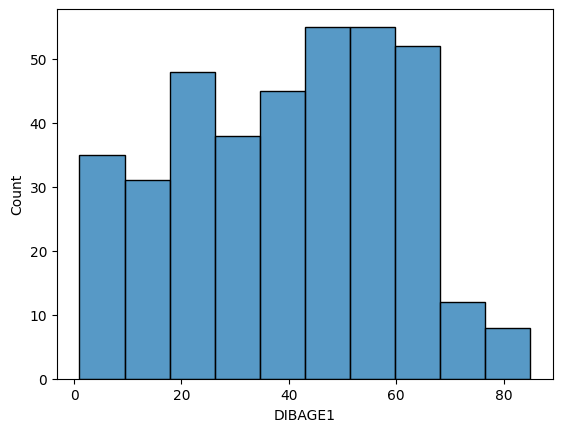

In [8]:
sns.histplot(diagnosis_age[diagnosis_age < 96])

We notice that the "age diagnosed with diabetes" is quite spread in type 1 diabetics.

Additionally, the data described the following values: 
- 97 Refused
- 98 Not ascertained
- 99 Don't know

Thus, we did not include those values in the histogram.

<AxesSubplot:xlabel='DIFAGE2', ylabel='Count'>

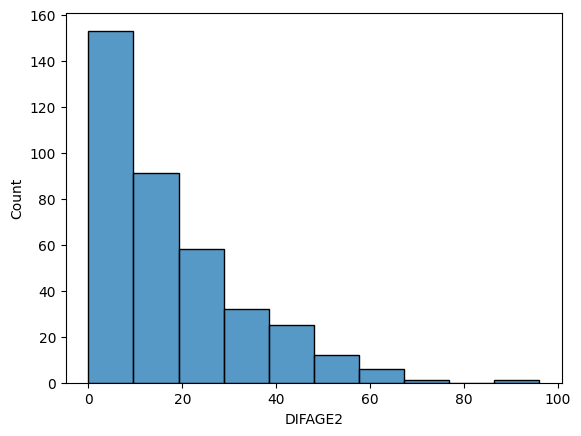

In [9]:
dif_age = type1_df['DIFAGE2'][type1_df['DIFAGE2'] < 97]

sns.histplot(dif_age, bins = 10)

The difference in age since first diagnosis appears to be crowded between 0 to 20 years

Now we will determine which features we would like to study. To reiterate, we want to find a correlation between age of diagnosis and presence of complications

#### Determine relevant features - will focus on complications

In [10]:
features = ['DIBAGE1','DIFAGE2', 'HYPEV', 'CHLEV', 'CHDEV', 'ANGEV', 'MIEV', 'HRTEV', 'STREV', 'EPHEV',
                 'COPDEV', 'AASMEV', 'ULCEV', 'ULCCOLEV', 'CANEV', 'SINYR', 'CBRCHYR', 
                 'KIDWKYR', 'LIVYR', 'ARTH1', 'VIM_GLEV', 'FLA1AR']

In [11]:
def featured(df, lst):
    return df[df['DIBAGE1'] < 95][lst]

type1_df2 = featured(type1_df, features)
type1_df2

,DIBAGE1,DIFAGE2,HYPEV,CHLEV,CHDEV,ANGEV,MIEV,HRTEV,STREV,EPHEV,COPDEV,AASMEV,ULCEV,ULCCOLEV,CANEV,SINYR,CBRCHYR,KIDWKYR,LIVYR,ARTH1,VIM_GLEV,FLA1AR
16,9.0,9.0,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2
117,8.0,35.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
229,15.0,36.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
252,38.0,14.0,1,1,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,1,2,1
297,85.0,0.0,1,1,2,2,2,2,1,2,2,2,2,2,1,2,2,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32599,18.0,4.0,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2
32745,6.0,34.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
32899,50.0,7.0,1,2,9,2,1,1,2,2,2,1,2,2,2,2,2,1,2,2,2,1
32900,82.0,3.0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1


In [12]:
type1_df2.isnull().sum()

DIBAGE1     0
DIFAGE2     0
HYPEV       0
CHLEV       0
CHDEV       0
ANGEV       0
MIEV        0
HRTEV       0
STREV       0
EPHEV       0
COPDEV      0
AASMEV      0
ULCEV       0
ULCCOLEV    0
CANEV       0
SINYR       0
CBRCHYR     0
KIDWKYR     0
LIVYR       0
ARTH1       0
VIM_GLEV    0
FLA1AR      0
dtype: int64

Check cancer variable as well

In [13]:
cancer_variables = ['CNKIND1', 'CNKIND2', 'CNKIND3', 'CNKIND4', 'CNKIND5', 'CNKIND6', 'CNKIND7', 'CNKIND8',
                    'CNKIND9', 'CNKIND10', 'CNKIND11', 'CNKIND12', 'CNKIND13', 'CNKIND14', 'CNKIND15', 'CNKIND16',
                    'CNKIND17', 'CNKIND18', 'CNKIND19', 'CNKIND20', 'CNKIND21', 'CNKIND22', 'CNKIND23', 'CNKIND24',
                    'CNKIND25', 'CNKIND26', 'CNKIND27', 'CNKIND28', 'CNKIND29', 'CNKIND30', 'CNKIND31']


In [14]:
type1_df[cancer_variables].isnull().sum()

CNKIND1     348
CNKIND2     348
CNKIND3     348
CNKIND4     348
CNKIND5     348
CNKIND6     367
CNKIND7     348
CNKIND8     348
CNKIND9     348
CNKIND10    348
CNKIND11    348
CNKIND12    348
CNKIND13    348
CNKIND14    348
CNKIND15    348
CNKIND16    348
CNKIND17    348
CNKIND18    367
CNKIND19    348
CNKIND20    374
CNKIND21    348
CNKIND22    348
CNKIND23    348
CNKIND24    348
CNKIND25    348
CNKIND26    374
CNKIND27    348
CNKIND28    348
CNKIND29    367
CNKIND30    348
CNKIND31    391
dtype: int64

Too many missing variables for cancer related questions. Will have to focus on  variable "CANEV" which only mentions whether a patient has ever had a type of cancer. 

In [15]:
def age_by_group(df):
    bins = [0, 10, 20, 30, 40, 100]
    labels = ['<10', '10-20', '20-30', '30-40', '40+']
    df['Age_Group'] = pd.cut(df['DIBAGE1'], bins=bins, labels=labels)
    return df

type1_df3 = age_by_group(type1_df2)
type1_df3

,DIBAGE1,DIFAGE2,HYPEV,CHLEV,CHDEV,ANGEV,MIEV,HRTEV,STREV,EPHEV,COPDEV,AASMEV,ULCEV,ULCCOLEV,CANEV,SINYR,CBRCHYR,KIDWKYR,LIVYR,ARTH1,VIM_GLEV,FLA1AR,Age_Group
16,9.0,9.0,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,<10
117,8.0,35.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,<10
229,15.0,36.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,10-20
252,38.0,14.0,1,1,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,1,2,1,30-40
297,85.0,0.0,1,1,2,2,2,2,1,2,2,2,2,2,1,2,2,2,2,2,2,1,40+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32599,18.0,4.0,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,10-20
32745,6.0,34.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,<10
32899,50.0,7.0,1,2,9,2,1,1,2,2,2,1,2,2,2,2,2,1,2,2,2,1,40+
32900,82.0,3.0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,40+


Check to see if any of the responses are other than "Yes" or "NO"

In [27]:
def check_binary_columns(df, lst):
    for col in lst:
        if not df[col].isin([1, 2]).all():
            print(f"Column '{col}' has invalid values.")

# List of columns that should only contain values of 1 and 2
complications = ['HYPEV', 'CHLEV', 'CHDEV', 'ANGEV', 'MIEV', 'HRTEV', 'STREV', 'EPHEV',
                  'COPDEV', 'AASMEV', 'ULCEV', 'ULCCOLEV', 'CANEV', 'SINYR', 'CBRCHYR', 
                  'KIDWKYR', 'LIVYR', 'ARTH1', 'VIM_GLEV', 'FLA1AR']

# Run the check
check_binary_columns(type1_df3, complications)

Column 'CHDEV' has invalid values.
Column 'LIVYR' has invalid values.


<AxesSubplot:xlabel='LIVYR', ylabel='Count'>

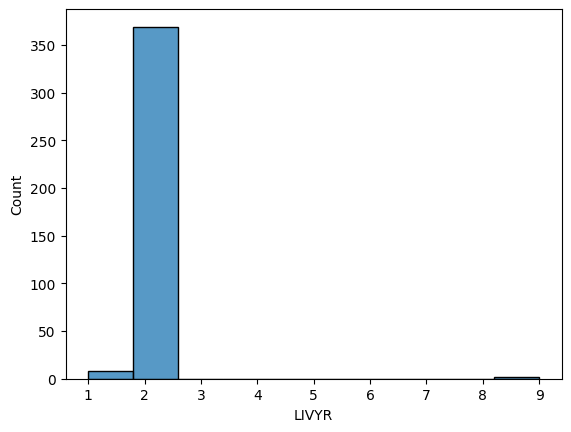

In [24]:
sns.histplot(type1_df3['LIVYR'])

It appears there is at least one response for LIVYR and CHDEV with a missing answer

In [25]:
def drop_invalid_rows(df, lst):
    # Keep only rows where all values in binary_columns are either 1 or 2
    valid_rows = df[df[lst].isin([1, 2]).all(axis=1)]
    
    # Drop DIBAGE1 and DIBAGE2 columns
    valid_rows = valid_rows.drop(columns=['DIBAGE1', 'DIFAGE2'])
    
    return valid_rows

# Drop rows with invalid values in binary columns and DIBAGE1, DIBAGE2 columns
type1_df4 = drop_invalid_rows(type1_df3, complications)

# Check the shape of the resulting dataframe
type1_df4.shape


(375, 21)

In [27]:
# Replace 2 (No) with 0 and keep 1 (Yes) as 1

type1_df4[complications] = type1_df3[binary_columns].replace({1: 1, 2: 0})



In [28]:
type1_df4

,HYPEV,CHLEV,CHDEV,ANGEV,MIEV,HRTEV,STREV,EPHEV,COPDEV,AASMEV,ULCEV,ULCCOLEV,CANEV,SINYR,CBRCHYR,KIDWKYR,LIVYR,ARTH1,VIM_GLEV,FLA1AR,Age_Group
16,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,<10
117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,<10
229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,10-20
252,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,30-40
297,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,40+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32522,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,40+
32599,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,10-20
32745,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,<10
32900,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,40+


In [29]:
type1_df4.to_csv('type1_diabetes.csv', index=False)

## Will conduct the same cleaning steps for Type 2 diabetes

In [22]:
type2_df = type_diabetes(diabetes_pd, 2)
type2_df

,FPX,FMX,HHX,INTV_QRT,WTIA_SA,WTFA_SA,SEX,HISPAN_I,R_MARITL,MRACRPI2,RACERPI2,MRACBPI2,AGE_P,RECTYPE,SRVY_YR,INTV_MON,REGION,PSTRAT,PPSU,PROX1,PROX2,LATEINTA,PROXYSA,PAR_STAT,FDRN_FLG,DOINGLWA,WHYNOWKA,EVERWRK,SUPERVIS,WRKCATA,BUSINC1A,LOCALL1B,WRKLONGH,HOURPDA,PDSICKA,ONEJOB,WRKLYR4,INDSTRN1,INDSTRN2,OCCUPN1,OCCUPN2,YRSWRKPA,DIFAGE2,HYPEV,HYPDIFV,HYPMDEV2,HYPMED2,CHLEV,CHLYR,CHLMDEV2,CHLMDNW2,CHDEV,ANGEV,MIEV,HRTEV,STREV,EPHEV,COPDEV,ASPMEDEV,ASPMEDAD,ASPMDMED,ASPONOWN,AASMEV,AASSTILL,AASMYR,AASERYR1,ULCEV,ULCYR,ULCCOLEV,CANEV,CNKIND1,CNKIND2,CNKIND3,CNKIND4,CNKIND5,CNKIND6,CNKIND7,CNKIND8,CNKIND9,CNKIND10,CNKIND11,CNKIND12,CNKIND13,CNKIND14,CNKIND15,CNKIND16,CNKIND17,CNKIND18,CNKIND19,CNKIND20,CNKIND21,CNKIND22,CNKIND23,CNKIND24,CNKIND25,CNKIND26,CNKIND27,CNKIND28,CNKIND29,CNKIND30,CNKIND31,PREGEVER,DBHVPAY,DBHVCLY,DBHVWLY,DBHVPAN,DBHVCLN,DBHVWLN,DIBREL,DIBEV1,DIBPRE2,DIBTEST,DIBTYPE,DIBPILL1,INSLN1,DIBINS2,DIBINS3,DIBINS4,DIBGDM,DIBBABY,DIBPRGM,DIBREFER,DIBBEGIN,AHAYFYR,SINYR,CBRCHYR,KIDWKYR,LIVYR,JNTSYMP,JMTHP1,JMTHP2,JMTHP3,JMTHP4,JMTHP5,JMTHP6,JMTHP7,JMTHP8,JMTHP9,JMTHP10,JMTHP11,JMTHP12,JMTHP13,JMTHP14,JMTHP15,JMTHP16,JMTHP17,JNTCHR,JNTHP,ARTH1,ARTHLMT,PAINECK,PAINLB,PAINLEG,PAINFACE,AMIGR,ACOLD2W,AINTIL2W,PREGNOW,PREGFLYR,HRAIDNOW,HRAIDEV,AHEARST1,AVISION,ABLIND,VIM_DREV,VIMLS_DR,VIM_CAEV,VIMLS_CA,VIMCSURG,VIM_GLEV,VIMLS_GL,VIM_MDEV,VIMLS_MD,VIMGLASS,VIMREAD,VIMDRIVE,AVISREH,AVISDEV,AVDF_NWS,AVDF_CLS,AVDF_NIT,AVDF_DRV,AVDF_PER,AVDF_CRD,AVISEXAM,AVISACT,AVISPROT,LUPPRT,CHPAIN6M,PAINLMT,HYPYR1,CANAGE1,CANAGE2,CANAGE3,CANAGE4,CANAGE5,CANAGE6,CANAGE7,CANAGE8,CANAGE9,CANAGE10,CANAGE11,CANAGE12,CANAGE13,CANAGE14,CANAGE15,CANAGE16,CANAGE17,CANAGE18,CANAGE19,CANAGE20,CANAGE21,CANAGE22,CANAGE23,CANAGE24,CANAGE25,CANAGE26,CANAGE27,CANAGE28,CANAGE29,CANAGE30,DIBAGE1,ACHRC14A,ADURA14A,ADURB14A,AFLHC19_,AFLHC20_,AFLHC21_,AFLHC22_,AFLHC23_,AFLHC24_,AFLHC25_,AFLHC26_,AFLHC27_,AFLHC28_,AFLHC29_,AFLHC30_,AFLHC31_,AFLHC32_,AFLHC33_,AFLHC34_,AFLHCA1,AFLHCA10,AFLHCA11,AFLHCA12,AFLHCA13,AFLHCA15,AFLHCA16,AFLHCA17,AFLHCA18,AFLHCA2,AFLHCA3,AFLHCA4,AFLHCA5,AFLHCA6,AFLHCA7,AFLHCA8,AFLHCA9,AFLHCA90,AFLHCA91,AHSTATYR,ALCHRC1,ALCHRC10,ALCHRC11,ALCHRC12,ALCHRC13,ALCHRC15,ALCHRC16,ALCHRC17,ALCHRC18,ALCHRC19,ALCHRC2,ALCHRC20,ALCHRC21,ALCHRC22,ALCHRC23,ALCHRC24,ALCHRC25,ALCHRC26,ALCHRC27,ALCHRC28,ALCHRC29,ALCHRC3,ALCHRC30,ALCHRC31,ALCHRC32,ALCHRC33,ALCHRC34,ALCHRC4,ALCHRC5,ALCHRC6,ALCHRC7,ALCHRC8,ALCHRC9,ALCHRC90,ALCHRC91,ALCHRONR,ALCNDRT,ALDURA1,ALDURA10,ALDURA11,ALDURA12,ALDURA13,ALDURA15,ALDURA16,ALDURA17,ALDURA18,ALDURA19,ALDURA2,ALDURA20,ALDURA21,ALDURA22,ALDURA23,ALDURA24,ALDURA25,ALDURA26,ALDURA27,ALDURA28,ALDURA29,ALDURA3,ALDURA30,ALDURA31,ALDURA32,ALDURA33,ALDURA34,ALDURA4,ALDURA5,ALDURA6,ALDURA7,ALDURA8,ALDURA9,ALDURA90,ALDURA91,ALDURB1,ALDURB10,ALDURB11,ALDURB12,ALDURB13,ALDURB15,ALDURB16,ALDURB17,ALDURB18,ALDURB19,ALDURB2,ALDURB20,ALDURB21,ALDURB22,ALDURB23,ALDURB24,ALDURB25,ALDURB26,ALDURB27,ALDURB28,ALDURB29,ALDURB3,ALDURB30,ALDURB31,ALDURB32,ALDURB33,ALDURB34,ALDURB4,ALDURB5,ALDURB6,ALDURB7,ALDURB8,ALDURB9,ALDURB90,ALDURB91,ALHCA14A,ALTIME1,ALTIME10,ALTIME11,ALTIME12,ALTIME13,ALTIME15,ALTIME16,ALTIME17,ALTIME18,ALTIME19,ALTIME2,ALTIME20,ALTIME21,ALTIME22,ALTIME23,ALTIME24,ALTIME25,ALTIME26,ALTIME27,ALTIME28,ALTIME29,ALTIME3,ALTIME30,ALTIME31,ALTIME32,ALTIME33,ALTIME34,ALTIME4,ALTIME5,ALTIME6,ALTIME7,ALTIME8,ALTIME9,ALTIME90,ALTIME91,ALUNIT1,ALUNIT10,ALUNIT11,ALUNIT12,ALUNIT13,ALUNIT15,ALUNIT16,ALUNIT17,ALUNIT18,ALUNIT19,ALUNIT2,ALUNIT20,ALUNIT21,ALUNIT22,ALUNIT23,ALUNIT24,ALUNIT25,ALUNIT26,ALUNIT27,ALUNIT28,ALUNIT29,ALUNIT3,ALUNIT30,ALUNIT31,ALUNIT32,ALUNIT33,ALUNIT34,ALUNIT4,ALUNIT5,ALUNIT6,ALUNIT7,ALUNIT8,ALUNIT9,ALUNIT90,ALUNIT91,ATIME14A,AUNIT14A,BEDDAYR,FLA1AR,FLCARRY,FLCLIMB,FLGRASP,FLPUSH,FLREACH,FLRELAX,FLSHOP,FLSIT,FLSOCL,FLSTAND,FLSTOOP,FLWALK,SPECEQ,WKDAYR,SMKEV,SMKREG,SMKNOW,SMKQTNO,SMKQTTP,CIGSDA1,CIGDAMO,CIGSDA2,CIGQTYR,ECIGEV2,ECIGCUR2,ECIG30D2,CIGAREV2,CIGCUR2,CIG30D2,PIPEV2,PIPECUR2,SMKLSTB1,SMKLSCR2,VIGNO,VIGTP,VIGLNG

In [25]:
type2_df2 = featured(type2_df, features)
type2_df2.shape

(2850, 22)

In [26]:
type2_df3 = age_by_group(type2_df2)
type2_df3

,DIBAGE1,DIFAGE2,HYPEV,CHLEV,CHDEV,ANGEV,MIEV,HRTEV,STREV,EPHEV,COPDEV,AASMEV,ULCEV,ULCCOLEV,CANEV,SINYR,CBRCHYR,KIDWKYR,LIVYR,ARTH1,VIM_GLEV,FLA1AR,Age_Group
17,30.0,13.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,20-30
20,58.0,5.0,1,1,2,2,2,2,2,2,2,1,2,2,1,2,2,2,2,2,2,2,40+
23,54.0,6.0,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,40+
30,50.0,28.0,1,1,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,1,40+
32,53.0,6.0,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,40+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32957,85.0,96.0,2,1,1,2,1,2,2,2,2,2,2,2,1,2,2,2,2,1,2,1,40+
32963,48.0,10.0,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,1,40+
32970,55.0,4.0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,1,40+
33009,69.0,1.0,1,1,1,2,1,1,2,1,1,2,2,2,2,2,2,2,2,1,2,2,40+


In [28]:
check_binary_columns(type2_df3, complications)

Column 'HYPEV' has invalid values.
Column 'CHLEV' has invalid values.
Column 'CHDEV' has invalid values.
Column 'ANGEV' has invalid values.
Column 'MIEV' has invalid values.
Column 'HRTEV' has invalid values.
Column 'STREV' has invalid values.
Column 'EPHEV' has invalid values.
Column 'COPDEV' has invalid values.
Column 'AASMEV' has invalid values.
Column 'ULCEV' has invalid values.
Column 'ULCCOLEV' has invalid values.
Column 'CANEV' has invalid values.
Column 'SINYR' has invalid values.
Column 'CBRCHYR' has invalid values.
Column 'KIDWKYR' has invalid values.
Column 'LIVYR' has invalid values.
Column 'ARTH1' has invalid values.
Column 'VIM_GLEV' has invalid values.


DIBAGE1      0
DIFAGE2      0
HYPEV        0
CHLEV        0
CHDEV        0
ANGEV        0
MIEV         0
HRTEV        0
STREV        0
EPHEV        0
COPDEV       0
AASMEV       0
ULCEV        0
ULCCOLEV     0
CANEV        0
SINYR        0
CBRCHYR      0
KIDWKYR      0
LIVYR        0
ARTH1        0
VIM_GLEV     0
FLA1AR       0
Age_Group    0
dtype: int64

In [30]:
type2_df4 = drop_invalid_rows(type2_df3, complications)
type2_df4.shape

(2771, 21)

Dropped rows which had responses other than "Yes" or "No"

In [31]:
check_binary_columns(type2_df4, complications)

In [33]:
#Replace No values "2" to "0"

type2_df4[complications] = type2_df3[complications].replace({1: 1, 2: 0})

In [34]:
type2_df4

,HYPEV,CHLEV,CHDEV,ANGEV,MIEV,HRTEV,STREV,EPHEV,COPDEV,AASMEV,ULCEV,ULCCOLEV,CANEV,SINYR,CBRCHYR,KIDWKYR,LIVYR,ARTH1,VIM_GLEV,FLA1AR,Age_Group
17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20-30
20,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,40+
23,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,40+
30,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,40+
32,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,40+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32957,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,40+
32963,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,40+
32970,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,40+
33009,1,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,40+


In [35]:
type2_df4.to_csv('type2_diabetes.csv', index=False)